In [1]:
import sys

sys.path.insert(0, '../')
import utils.common as cm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = cm.get_dataframe()
df

,year,brand,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_city_Lkm,fuel_hwy_Lkm,fuel_comb_Lkm,fuel_comb_mpg,co2
0,2002,FORD,FOCUS SEDAN #,COMPACT,2.0,4,A4,X,9.1,6.8,8.1,35,186
1,2021,Porsche,Panamera Turbo S,Full-size,4.0,8,AM8,Z,15.3,11.2,13.5,21,326
2,2011,INFINITI,EX35 AWD,STATION WAGON - SMALL,3.5,6,AS7,Z,12.4,8.5,10.6,27,244
3,2005,BUICK,RENDEZVOUS AWD,SUV,3.4,6,A4,X,12.7,8.7,10.9,26,251
4,2016,ROLLS-ROYCE,GHOST EWB,FULL-SIZE,6.6,12,AS8,Z,19.2,12.4,16.1,18,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,2004,TOYOTA,TACOMA 4X4,PICKUP TRUCK - STANDARD,3.4,6,A4,X,14.6,11.3,13.1,22,301
18040,2004,BMW,Z4 ROADSTER,TWO-SEATER,2.5,6,AM6,Z,10.7,7.0,9.0,31,207
18041,2008,CADILLAC,STS,MID-SIZE,4.6,8,AS6,Z,14.1,8.1,11.4,25,262
18042,2022,Toyota,Camry AWD XSE,Mid-size,2.5,4,AS8,X,9.5,7.0,8.4,34,195


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18044 entries, 0 to 18043
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           18044 non-null  int64  
 1   brand          18044 non-null  object 
 2   model          18044 non-null  object 
 3   vehicle_class  18044 non-null  object 
 4   engine_size    18044 non-null  float64
 5   cylinders      18044 non-null  int64  
 6   transmission   18044 non-null  object 
 7   fuel_type      18044 non-null  object 
 8   fuel_city_Lkm  18044 non-null  float64
 9   fuel_hwy_Lkm   18044 non-null  float64
 10  fuel_comb_Lkm  18044 non-null  float64
 11  fuel_comb_mpg  18044 non-null  int64  
 12  co2            18044 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 1.8+ MB


In [4]:
# TODO:: Ver que hacer en caso de nulos

In [5]:
cm.data_report(df)

COL_N,year,brand,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_city_Lkm,fuel_hwy_Lkm,fuel_comb_Lkm,fuel_comb_mpg,co2
DATA_TYPE,int64,object,object,object,float64,int64,object,object,float64,float64,float64,int64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,23,87,3995,32,63,9,30,5,225,151,192,59,354
CARDIN (%),0.13,0.48,22.14,0.18,0.35,0.05,0.17,0.03,1.25,0.84,1.06,0.33,1.96


In [6]:
features_num = list(df.columns[df.dtypes != "object"])
features_num

['year',
 'engine_size',
 'cylinders',
 'fuel_city_Lkm',
 'fuel_hwy_Lkm',
 'fuel_comb_Lkm',
 'fuel_comb_mpg',
 'co2']

In [7]:
features_transform = features_num.copy()
features_transform.remove("cylinders")

features_transform

['year',
 'engine_size',
 'fuel_city_Lkm',
 'fuel_hwy_Lkm',
 'fuel_comb_Lkm',
 'fuel_comb_mpg',
 'co2']

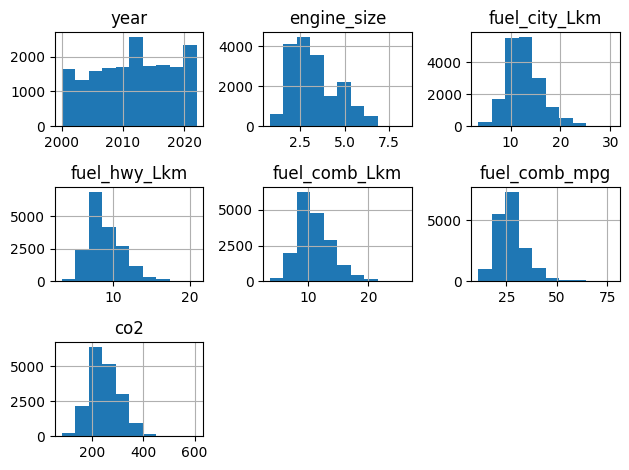

In [8]:
df[features_transform].hist()
plt.tight_layout()

In [9]:
features_log = features_transform.copy()
features_log.remove("year")

In [10]:
# # Transformación logarítmica para normalizar las columnas:
# log_transformer = FunctionTransformer(lambda x: np.log(x))

# log_pipeline = Pipeline(
#     [("Log_Transformer", log_transformer)]
# )


# scale_pipeline = Pipeline(
#     [("MinMaxScaler", MinMaxScaler())]
# )


# # Transformación columna cylinders a str:
# str_transformer = FunctionTransformer(lambda x: "c" + str(x))

# num_ohe_pipeline = Pipeline(
#     [
#      #   ("Str_Transformer", str_transformer)
#        ("OHE", OneHotEncoder(handle_unknown = "ignore"))
#     ]
# )


# preprocessing = ColumnTransformer(
#     [("Transform_Numeric", log_pipeline, features_log),
#      ("Scale_Numeric", scale_pipeline, features_transform),
#      ("Process_Numeric_OHE", num_ohe_pipeline, ["cylinders"]),
#     ], remainder = "passthrough")

In [11]:
# Transformación logarítmica para normalizar las columnas:
log_transformer = FunctionTransformer(lambda x: np.log(x))

log_pipeline = Pipeline(
    [("Log_Transformer", log_transformer),
     ("MinMaxScaler", MinMaxScaler())]
)


# scale_pipeline = Pipeline(
#     [("MinMaxScaler", MinMaxScaler())]
# )


# Transformación columna cylinders a str:
str_transformer = FunctionTransformer(lambda x: "c" + str(x))

num_ohe_pipeline = Pipeline(
    [
     #   ("Str_Transformer", str_transformer)
       ("OHE", OneHotEncoder(handle_unknown = "ignore"))
    ]
)


preprocessing = ColumnTransformer(
    [("Transform_Numeric", log_pipeline, features_transform),
    #  ("Scale_Numeric", scale_pipeline, features_transform),
     ("Process_Numeric_OHE", num_ohe_pipeline, ["cylinders"]),
    ], remainder = "passthrough")

In [12]:
pipe_train = preprocessing.fit_transform(df)
df_final = pd.DataFrame(pipe_train)


In [13]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.091363,0.389683,0.440686,0.401669,0.409354,0.590895,0.405209,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,FORD,FOCUS SEDAN #,COMPACT,A4,X
1,0.954782,0.684467,0.680318,0.667571,0.667216,0.330112,0.687005,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,Porsche,Panamera Turbo S,Full-size,AM8,Z
2,0.501367,0.627678,0.583393,0.520578,0.545138,0.458411,0.54151,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,INFINITI,EX35 AWD,STATION WAGON - SMALL,AS7,Z
3,0.228235,0.61535,0.594418,0.532971,0.559227,0.439144,0.555714,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,BUICK,RENDEZVOUS AWD,SUV,A4,X
4,0.728356,0.897438,0.785037,0.721809,0.756125,0.251416,0.754639,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,ROLLS-ROYCE,GHOST EWB,FULL-SIZE,AS8,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,0.182634,0.61535,0.658719,0.672308,0.652033,0.353861,0.646938,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,TOYOTA,TACOMA 4X4,PICKUP TRUCK - STANDARD,A4,X
18040,0.182634,0.484582,0.515387,0.417116,0.462539,0.528939,0.458928,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,BMW,Z4 ROADSTER,TWO-SEATER,AM6,Z
18041,0.364903,0.743905,0.642647,0.494892,0.581867,0.419121,0.577253,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,CADILLAC,STS,MID-SIZE,AS6,Z
18042,1.0,0.484582,0.460526,0.417116,0.427712,0.576096,0.428938,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Toyota,Camry AWD XSE,Mid-size,AS8,X


In [ ]:
print(preprocessing.transformers_[2][1].named_steps["OHE"].get_feature_names_out(["cylinders"]))

columns = df.columns
columns


#df_final.columns = 

In [ ]:
encoded_cols = preprocessing.transformers_[2][0].named_steps['OHE'].get_feature_names_out(df.columns)

In [ ]:
# 1 Aplicar logaritmo a todas las variables numéricas

df[features_log] = np.log1p(df[features_log])
df


In [ ]:
df[features_transform].hist()
plt.tight_layout()

In [ ]:
df[features_transform].describe().T

In [ ]:
df

In [ ]:
# 2 Escalar features_transform y año
df_scaled = df.copy()

scaler = MinMaxScaler()
df_scaled[features_transform] = pd.DataFrame(scaler.fit_transform(df_scaled[features_transform]))


In [ ]:
df_scaled.head()

In [ ]:
df_scaled.cylinders.unique()

In [ ]:
# 2 Cilindros pasar a OneHotEncoding
column_cylinders = "cylinders"

# df_scaled[column_cylinders] = df_scaled[column_cylinders].apply(lambda x: "c" + str(x))


In [ ]:
df_scaled

In [ ]:
df_scaled.info()

In [ ]:
df_encoded = pd.get_dummies(df_scaled, columns = df_scaled.columns, dtype = int).reindex(columns = df_scaled.columns, fill_value = 0)
df_encoded

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

df_final = pd.DataFrame(encoder.fit_transform(df_encoded[[column_cylinders]]))
df_final

#OHEncoder = OneHotEncoder(handle_unknown='ignore', sparse=) # Comentar en la presentación

# OHEncoder.fit(df_scaled[column_cylinders], dtype)
# OHEncoder.transform(df_scaled[column_cylinders])

# pd.DataFrame(OHEncoder.transform(df_scaled["cylinders"]).toarray(), columns = OHEncoder.get_feature_names_out())], axis = 1)

#     X_temp = pd.concat([X_temp, pd.DataFrame(OHEncoder.transform(X_temp[cols_to_encode]).toarray(),
#                                             columns = OHEncoder.get_feature_names_out())], axis = 1)
#     return X_temp.drop(cols_to_encode, axis = 1)